Reading data...
Data loaded successfully!

                    Statistical Summary                     

【neg1-neg2】
  Sample Size: 75658
  Mean:        3.2089
  Median:      1.6000
  Std Dev:     3.1020
  Min:         0.0100
  Max:         13.9200
  25th %ile:   0.8300
  75th %ile:   5.5100

【neg1-pos2】
  Sample Size: 75658
  Mean:        7.1944
  Median:      7.0000
  Std Dev:     2.6760
  Min:         0.0700
  Max:         15.7200
  25th %ile:   5.3500
  75th %ile:   9.2700

【pos1-neg2】
  Sample Size: 75658
  Mean:        6.4455
  Median:      6.2600
  Std Dev:     2.5097
  Min:         0.0700
  Max:         15.5200
  25th %ile:   4.9200
  75th %ile:   8.1800

【pos1-pos2】
  Sample Size: 75658
  Mean:        8.1182
  Median:      8.8700
  Std Dev:     3.3151
  Min:         0.0400
  Max:         16.8700
  25th %ile:   6.4600
  75th %ile:   10.4000


Generating charts...


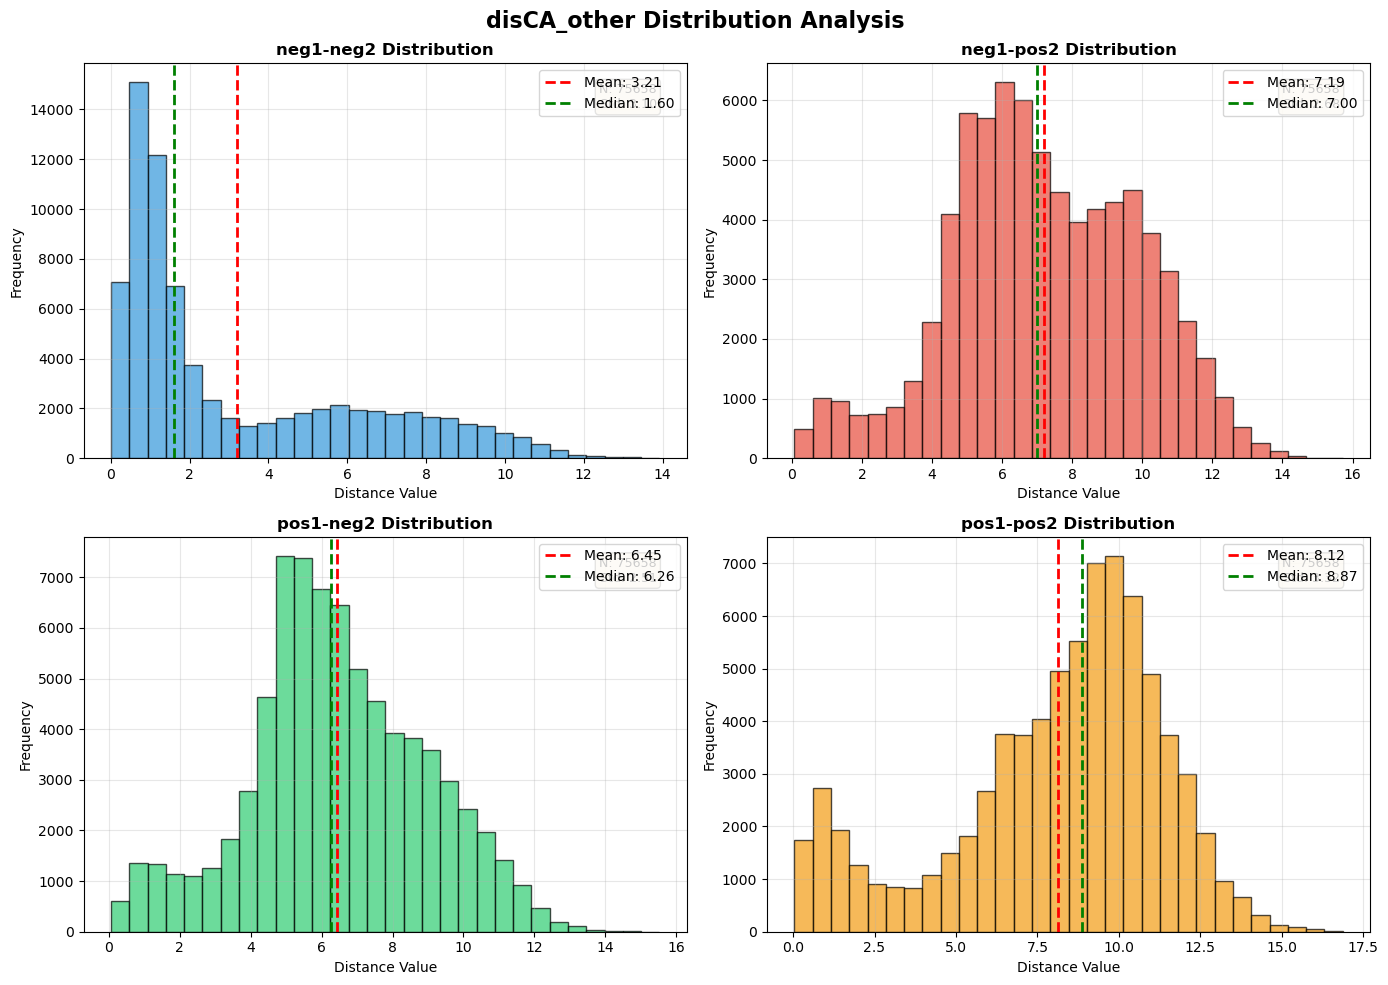

Chart saved as 'disCA_other.png'


In [12]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def parse_txt_files(directory):
    """Parse all txt files in the directory"""
    data = {
        'neg1-neg2': [],
        'neg1-pos2': [],
        'pos1-neg2': [],
        'pos1-pos2': []
    }
    
    # Traverse all txt files in the directory
    for file_path in Path(directory).glob('*.txt'):
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            
        # Find lines containing "与" and ":"
        pattern = r'与.*?:\s*pi1-pi2:([\d.]+),pi1-cation2:([\d.]+),cation1-pi2:([\d.]+),cation1-cation2:([\d.]+)'
        matches = re.findall(pattern, content)
        
        for match in matches:
            data['neg1-neg2'].append(float(match[0]))
            data['neg1-pos2'].append(float(match[1]))
            data['pos1-neg2'].append(float(match[2]))
            data['pos1-pos2'].append(float(match[3]))
    
    return data

def plot_distributions(data):
    """Plot distribution charts"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('disCA_other Distribution Analysis', fontsize=16, fontweight='bold')
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    keys = list(data.keys())
    
    for idx, (ax, key, color) in enumerate(zip(axes.flat, keys, colors)):
        values = data[key]
        
        # Plot histogram
        n, bins, patches = ax.hist(values, bins=30, alpha=0.7, color=color, edgecolor='black')
        
        # Calculate statistics
        mean_val = np.mean(values)
        median_val = np.median(values)
        std_val = np.std(values)
        
        # Add mean and median lines
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        
        # Set title and labels
        ax.set_title(f'{key} Distribution', fontsize=12, fontweight='bold')
        ax.set_xlabel('Distance Value', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add statistics text box
        textstr = f'N: {len(values)}\nStd: {std_val:.2f}'
        ax.text(0.95, 0.95, textstr, transform=ax.transAxes, 
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig('disCA_other.png', dpi=300, bbox_inches='tight')
    plt.show()

def print_statistics(data):
    """Print statistical information"""
    print("\n" + "="*60)
    print("Statistical Summary".center(60))
    print("="*60)
    
    for key in data.keys():
        values = data[key]
        print(f"\n【{key}】")
        print(f"  Sample Size: {len(values)}")
        print(f"  Mean:        {np.mean(values):.4f}")
        print(f"  Median:      {np.median(values):.4f}")
        print(f"  Std Dev:     {np.std(values):.4f}")
        print(f"  Min:         {np.min(values):.4f}")
        print(f"  Max:         {np.max(values):.4f}")
        print(f"  25th %ile:   {np.percentile(values, 25):.4f}")
        print(f"  75th %ile:   {np.percentile(values, 75):.4f}")
    
    print("\n" + "="*60)

# Main program
if __name__ == "__main__":
    # Set your directory path
    directory ="/home/databank_70t/pengziyu/scop/251018/2A-con-disCA/other/" # Change to your actual path
    
    print("Reading data...")
    data = parse_txt_files(directory)
    
    print(f"Data loaded successfully!")
    print_statistics(data)
    
    print("\nGenerating charts...")
    plot_distributions(data)
    print("Chart saved as 'disCA_other.png'")